Técnicas de Aprendizaje Automático -- Almudena Ruiz-Iniesta
# Tema 2: Análisis de datos. Descriptivo y exploratorio.
## ¿Existe un dataset para resolver un problema de aprendizaje automático? El caso del Titanic.

1. Introducción
2. Tipos de variables
3. Caracterización de las distribuciones de las variables
4. . Medidas de dispersi
5. .5 Detección de valores atípi
6. .6. Diagramas de disper
7. 2.7. Correlación entre vari
8. Análisis exploratorior
## Introducción

El Análisis Exploratorio de Datos o en inglés Exploratory Data Analysis (EDA) es un método de análisis de los conjuntos de datos para resumir sus principales características.

El EDA se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con ayuda de la estadística y representaciones gráficas.

**¿Qué es?**. Conjunto de técnicas estadísticas dirigidas a explorar, describir y resumir la información que contienen los
datos, maximizando su comprensión.

> Gracias al EDA podemos: 
> - Realizar un análisis descriptivo de los datos.
> - Identificar posibles errores.
> - Revelar la presencia de datos atípicos.
> - Comprobar la relación entre variables.

Preguntas que habitualmente haremos a los datos:
- ¿cuántos son y están todos?
- ¿cuál es el tipo de datos de cada columna?
- ¿existen registros nulos/perdidos/outliers?
- MLsupervised. features vs target
- MLsupervised - clasificación. ¿dataset balanceado?
- ¿qué features parecen ser las más relevantes? (distribución, correlación)

Después de realizar el EDA tenemos más información para abordar mejor la tarea de ML. Incluso para decidir si ML puede resolver la tarea o no.

_Nota: esta tarea puede llevar horas (o algún día)._

**¿Cuáles son los pasos a seguir??**

- Análisis descriptivo.
- Ajuste de tipos de variable.
- Detección y tratamiento de datos ausentes.
- Identificación de datos atípicos.
- Corrrelación de variables.

### EL TITANIC

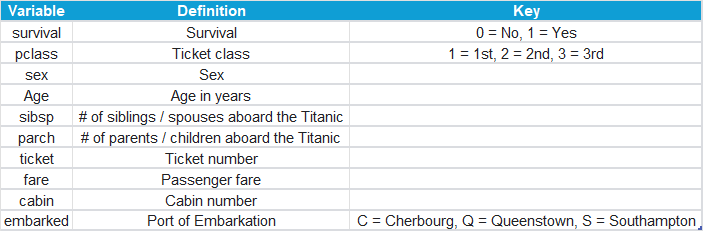

uthampton
uthampton
outhamptond paragraph textianza

In [1]:
import pandas as pd

dataset = pd.read_csv('train.csv')

In [2]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Primeros pasos**

Conocer el número de filas y columnas para saber si se ha cargado completo el fichero, especialmente delicado en ficheros grandes, o para conocer si hay algún error en alguna linea.

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Tipos de variables

Nuestros datasets contienen observaciones que son la representación de un mundo/dominio/problema. Estas observaciones están formadas por variables.

__Una variable se define como una 
característica o atributo de un objeto que puede ser observable y susceptible d 
variación debido a que puede medirse, así como puede asumir diferentes valor s
(Dicovskiy Riobóo, 201__

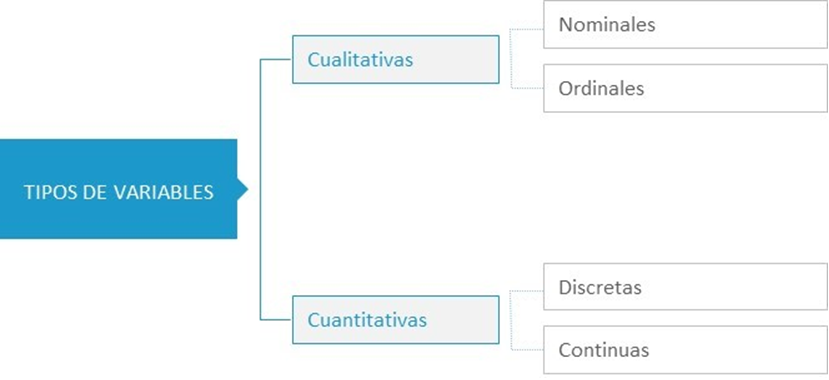
2).

- Variables cualitativas nominales: Name, Sex, Ticket, Embarked
- Variables cualitativas ordinales: Cabin, 
- Variables cuantitativas discretas: PassengerId, Survived, Pclass, Age, SibSp, Parch, 
- Variables cuantitativas continuas: Fare, 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Caracterización de las distribuciones de las variables

Explorar los valores que tienen las variables.


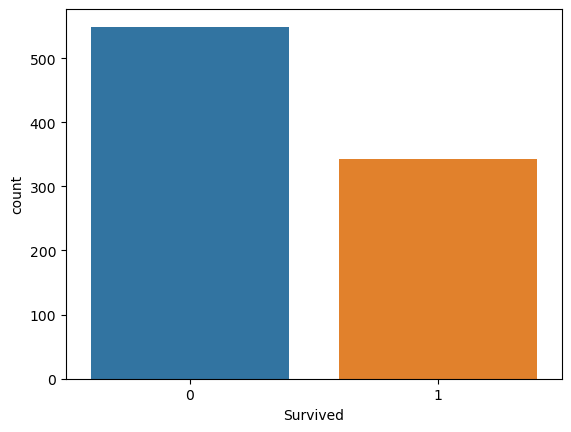

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.countplot(dataset, x='Survived')
plt.show()

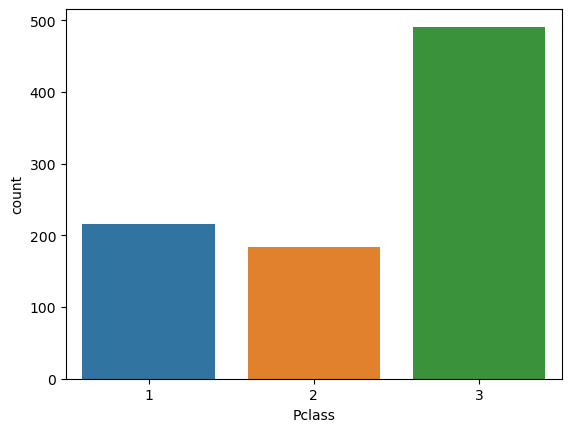

In [7]:
sb.countplot(dataset, x='Pclass')
plt.show()

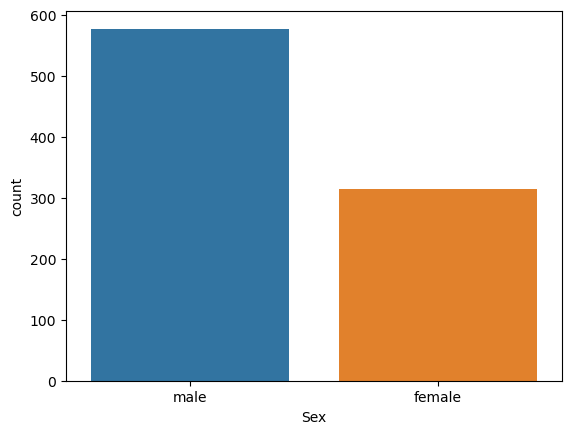

In [8]:
sb.countplot(dataset, x='Sex')
plt.show()

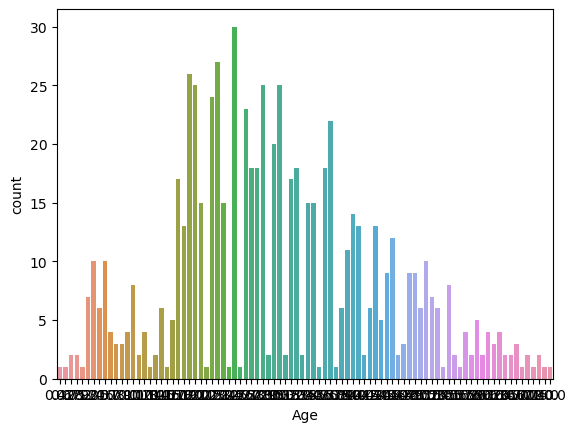

In [9]:
sb.countplot(dataset, x='Age')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

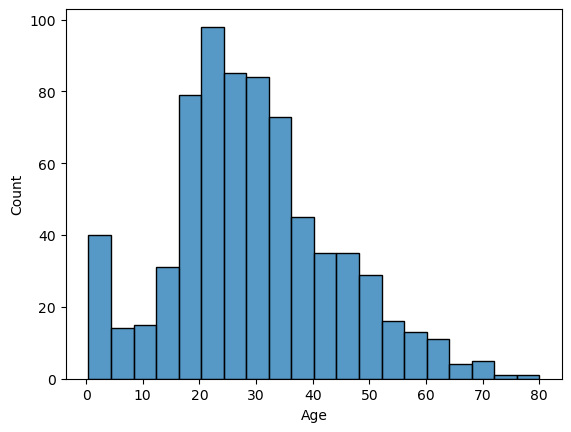

In [10]:
sb.histplot(data=dataset, x='Age', bins=20)

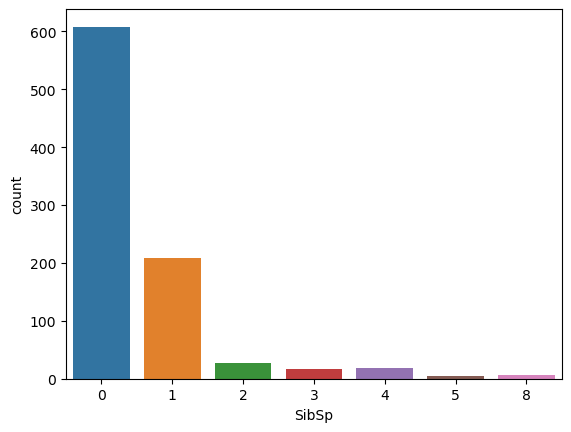

In [11]:
sb.countplot(dataset, x='SibSp')
plt.show()

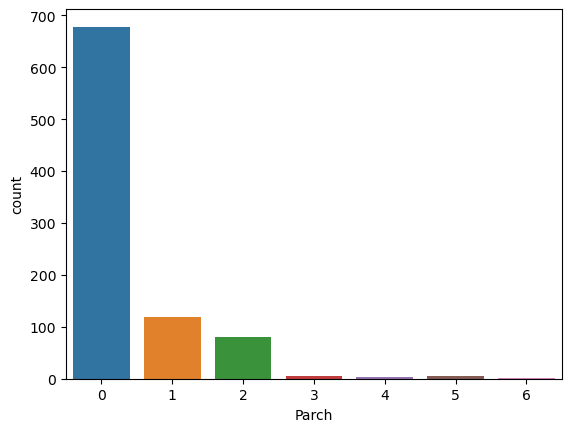

In [12]:
sb.countplot(dataset, x='Parch')
plt.show()

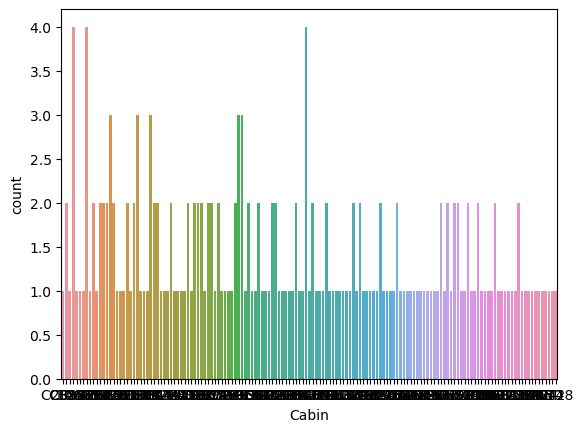

In [13]:
sb.countplot(dataset, x='Cabin')
plt.show()

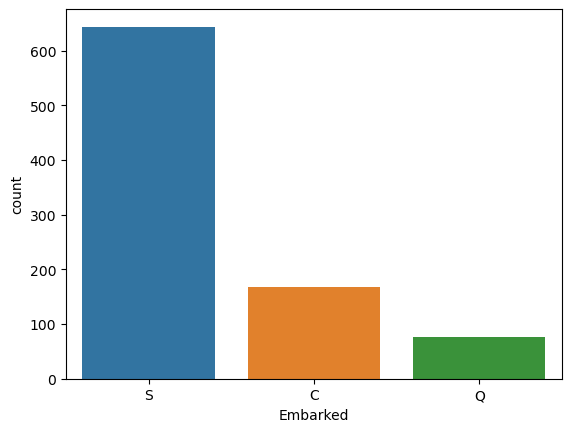

In [14]:
sb.countplot(dataset, x='Embarked')
plt.show()

In [15]:
dataset['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Medidas de dispersion

Esta función muestra las caracterísitcas estadísticas básicas de cada variable numérica
_number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles._

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales. Utilizando cuartiles se puede evaluar rápidamente la dispersión y la tendencia central de un conjunto de datos.

In [16]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Detección de valores atípicos

Los gráficos de caja/bigotes (Box Plots) fueron originalmente desarrollados por M.E. Spear, permiten conocer cómo se distribuyen los datos dentro de una variable. 

A diferencia de los histogramas que requieren un tamaño de muestra de al menos 30 casos para ser útiles, los gráficos de caja pueden ser construidos con tan solo 5 casos y aportan más detalles acerca de las colas de la distribución.

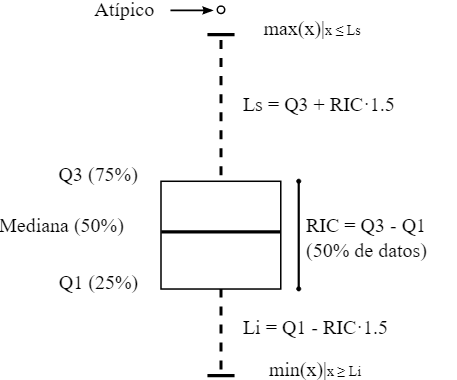

* Mediana. Valor que deja a la mitad de los casos por encima y a la otra mitad por debajo.
* Primer Cuartil (Q1). El 25% de los casos se encuentran por debajo de este valor.
* Tercer Cuartil (Q3). El 75% de los casos se encuentran por encima de este valor.
* Rango Intercuartílico (RIC). Es la diferencia entre el tercer y el primer cuartil.
* Límites Superior o Inferior (Ls o Li). Ls contiene los casos por encima de Q3 más 1,5 veces el rango intercuartílico o Li por debajo de Q1 – 1,5xRIC (Estilo de Tukey). Cuando los valores no son posibles en lugar de emplear la aproximación anterior se escogen los valores máximo o mínimo de la muestra (Estilo de Spears).

Los valores atípicos son aquellos que están más a allá de los límites inferior y superior. Cuando los valores atípicos están más allá de 3 veces el RIC en lugar del 1.5 son denominados valores extremos.

<Axes: xlabel='Age'>

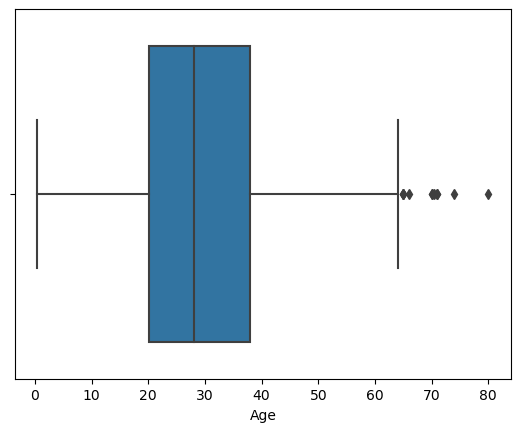

In [17]:
sb.boxplot(x=dataset["Age"])


<Axes: xlabel='Fare'>

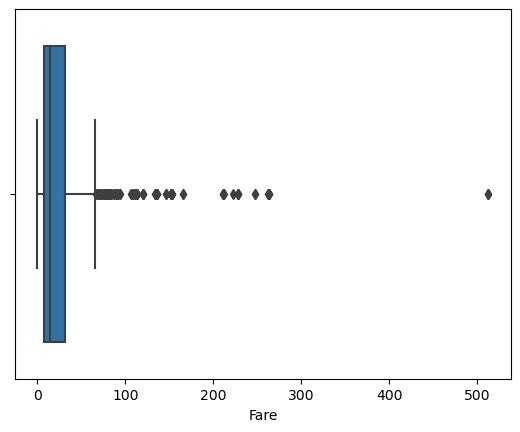

In [18]:
sb.boxplot(x=dataset["Fare"])


<Axes: xlabel='SibSp'>

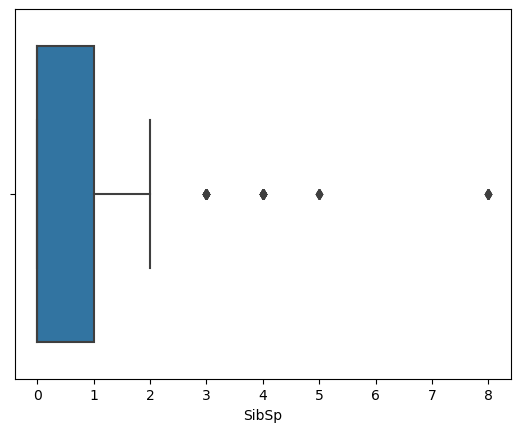

In [19]:
sb.boxplot(x=dataset["SibSp"])


## Diagramas de dispersión
Las representaciones gráficas más útiles para describir el comportamiento de un conjunto de variables son los diagramas de dispersión, también conocidos como diagramas de puntos o scatter plots. Estas gráficas muestran la relación existente entre las variables numéricas (Catálogo de Visualización de Datos, s. f.) y, además, permiten descubrir y confirmar las relaciones anticipadas entre dos conjuntos asociados de datos (Hernández Martín, 2012). 



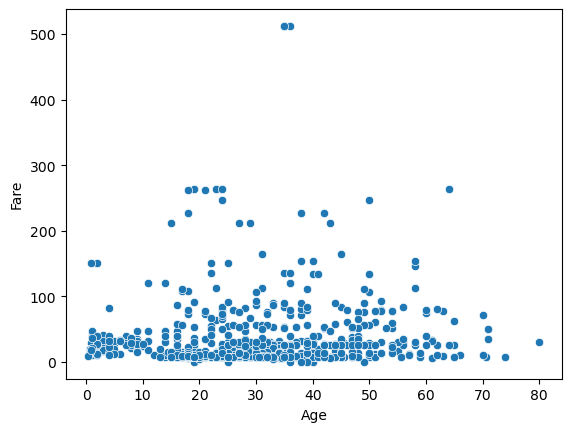

In [20]:
sb.scatterplot(data=dataset, x='Age', y='Fare');

# precio que ha pagado el pasajero ("Fare") con su edad ("Age")

## Correlación entre variables

La correlación se conoce como la medida estadística que cuantifica el grado de variación conjunta que existe entre dos variables y que, en específico, evalúa la tendencia creciente o decreciente de los datos.

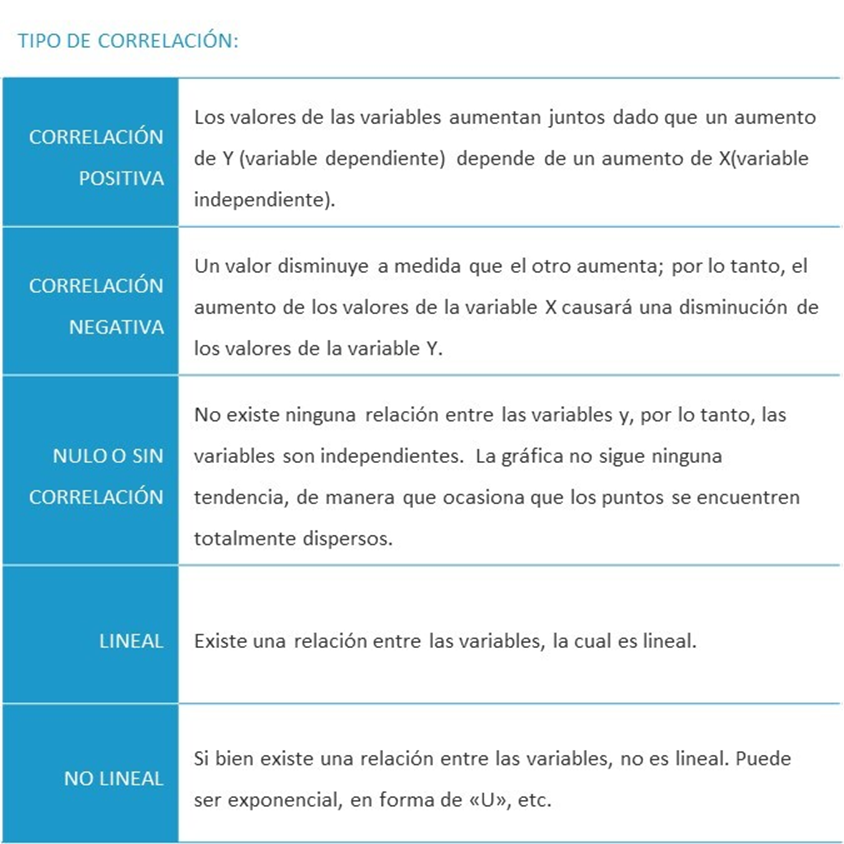

Conocer la correlación entre cada variable y la variable objetivo es útil, ya que una correlación alta* implica que existe una relación entre la variable y la variable objetivo. En general, es recomendable incluir variables con una correlación alta porque son las que tienen mayor poder predictivo y omitir variables con una correlación baja porque es probable que sean irrelevantes.

La correlación se encarga de medir la relación entre dos variables, esto no implica necesariamente causalidad pero puede ser útil para predicciones. La correlación significa que dos variables tienen algún tipo de relación detectable, mientras que la causalidad implicaría que una variable influye directamente en la otra.

Hay varios tipos de correlación, la más utilizada es la de Pearson o lineal, seguida por la Spearman y Kendall.

_Coeficiente de correlación de Pearson_

La correlación de Pearson es la más intuitiva y sencilla, debido a esto suele ser la primera opción al medir correlaciones. Calcular el coeficiente de correlación de Pearson nos da un número que puede ir del -1 al 1. El primer valor indica una correlación perfectamente negativa, mientras que el segundo indica una correlación perfectamente positiva. Un valor de 0 por otro lado indicaría una correlación nula.
Decimos entonces que cuanto más cerca esté del 1 o -1 el valor de correlación la relación entre esas dos variables es más fuerte, debilitándose al acercarse al 0.

In [21]:
dataset['Survived'].corr(dataset['Age'])

-0.07722109457217755

In [22]:
dataset['Sex'].str.get_dummies().corrwith(dataset['Survived']/dataset['Survived'].max())


female    0.543351
male     -0.543351
dtype: float64

In [23]:
dataset['Survived'].corr(dataset['Fare'])

0.2573065223849622

__IMPORTANTE: ¡¡La correlación no es la probabilidad de que algo ocurra!!__

Dado que hemos calculado la correlación entre sexo y supervivencia (-54,3%) y edad y supervivencia (-7,72%), podemos decir algunas cosas con seguridad:
- El hecho de que un pasajero fuera un hombre estaba correlacionado negativamente con su supervivencia a bordo del Titanic.
- L
La edad de un pasajero tenía una correlación muy débil y negativa con la supervivencia.

## Análisis Exploratorio

En base a la tarea que se pretende resolver se hacen análisis sobre los datos para poder tener hipótesis con las que trabajar.

In [24]:
dataset.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

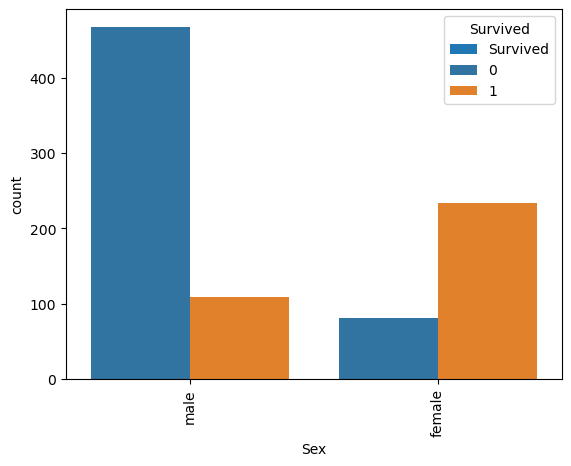

In [25]:
dataset[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot(x='Sex',hue='Survived',data=dataset)
plt.show()

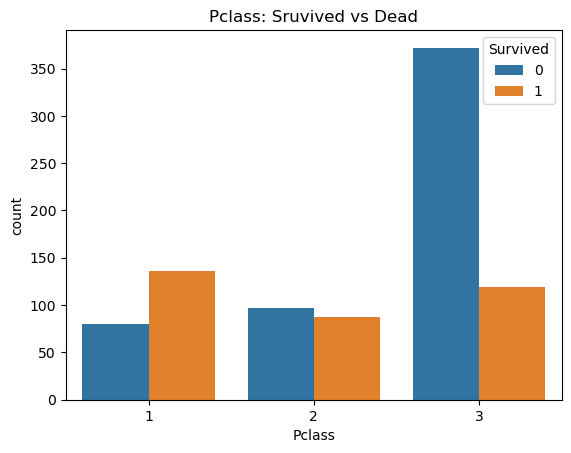

In [26]:
sb.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Pclass: Sruvived vs Dead')
plt.show()